In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.drop('Id',axis=1,inplace=True)

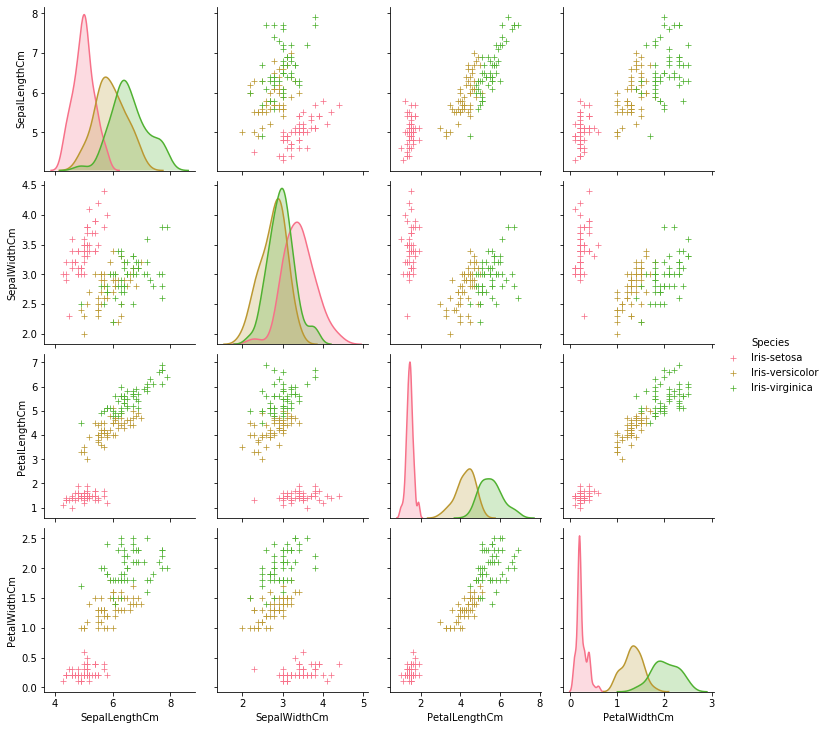

In [6]:
sns.pairplot(iris,hue='Species',markers='+')
plt.show()

In [7]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

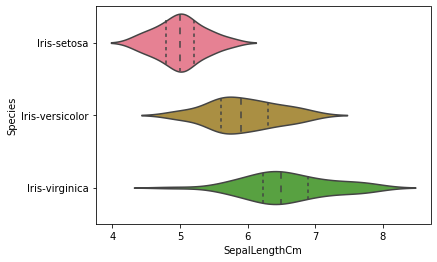

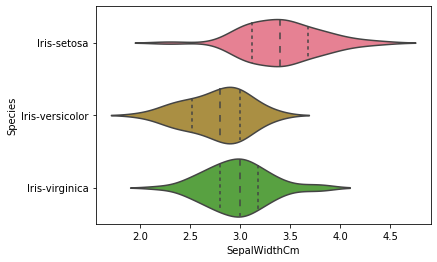

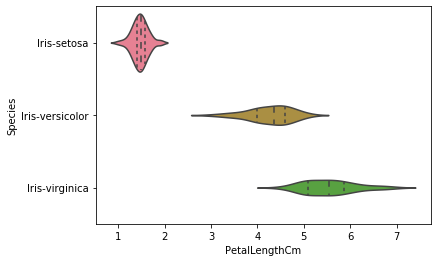

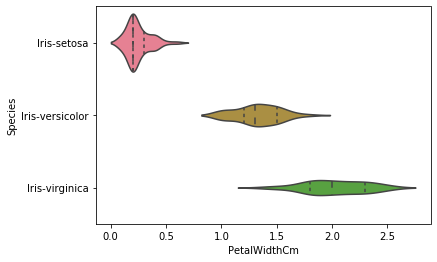

In [8]:
sns.violinplot(y='Species',x='SepalLengthCm',data=iris,inner='quartile')
plt.show()
sns.violinplot(y='Species',x='SepalWidthCm',data=iris,inner='quartile')
plt.show()
sns.violinplot(y='Species',x='PetalLengthCm',data=iris,inner='quartile')
plt.show()
sns.violinplot(y='Species',x='PetalWidthCm',data=iris,inner='quartile')
plt.show()

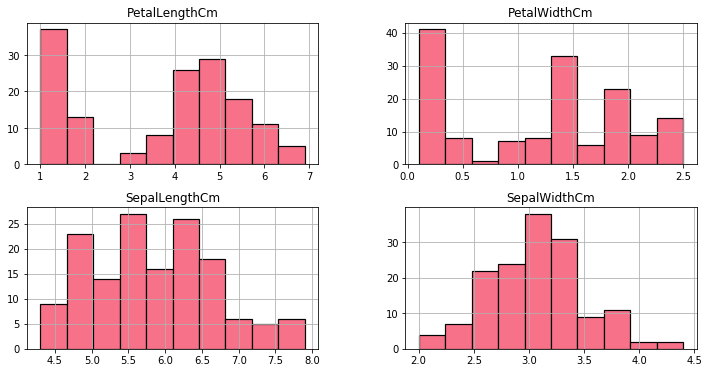

In [9]:
iris.hist(edgecolor='black',linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

In [11]:
iris.shape

(150, 5)

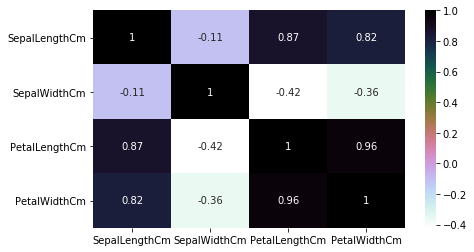

In [12]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [13]:
train,test = train_test_split(iris,test_size=0.3)

In [14]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [15]:
train_y=train.Species
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [16]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of the Model using SVM: ",metrics.accuracy_score(prediction,test_y))

The accuracy of the Model using SVM:  0.9777777777777777


In [17]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of the Model using Logistic Regression: ",metrics.accuracy_score(prediction,test_y))

The accuracy of the Model using Logistic Regression:  0.9777777777777777


In [18]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of the Model using Decision Tree Classifier: ",metrics.accuracy_score(prediction,test_y))

The accuracy of the Model using Decision Tree Classifier:  0.9777777777777777


In [19]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("The accuracy of the Model using KNN: ",metrics.accuracy_score(prediction,test_y))

The accuracy of the Model using KNN:  0.9555555555555556


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


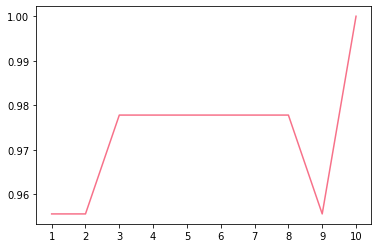

In [20]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

In [23]:
X=iris.drop(['Species'],axis =1)

In [24]:
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y=iris.Species

In [31]:
knn = KNeighborsClassifier()
knn.fit(X,y)

knn.predict([[6,3,4,2]])

array(['Iris-versicolor'], dtype=object)